# Series

In [132]:
import pandas as pd
#магия для отображения графиков в тетрадке
%matplotlib inline 

На первое время хорошо держать под рукой шпаргалку с набором полезных функций

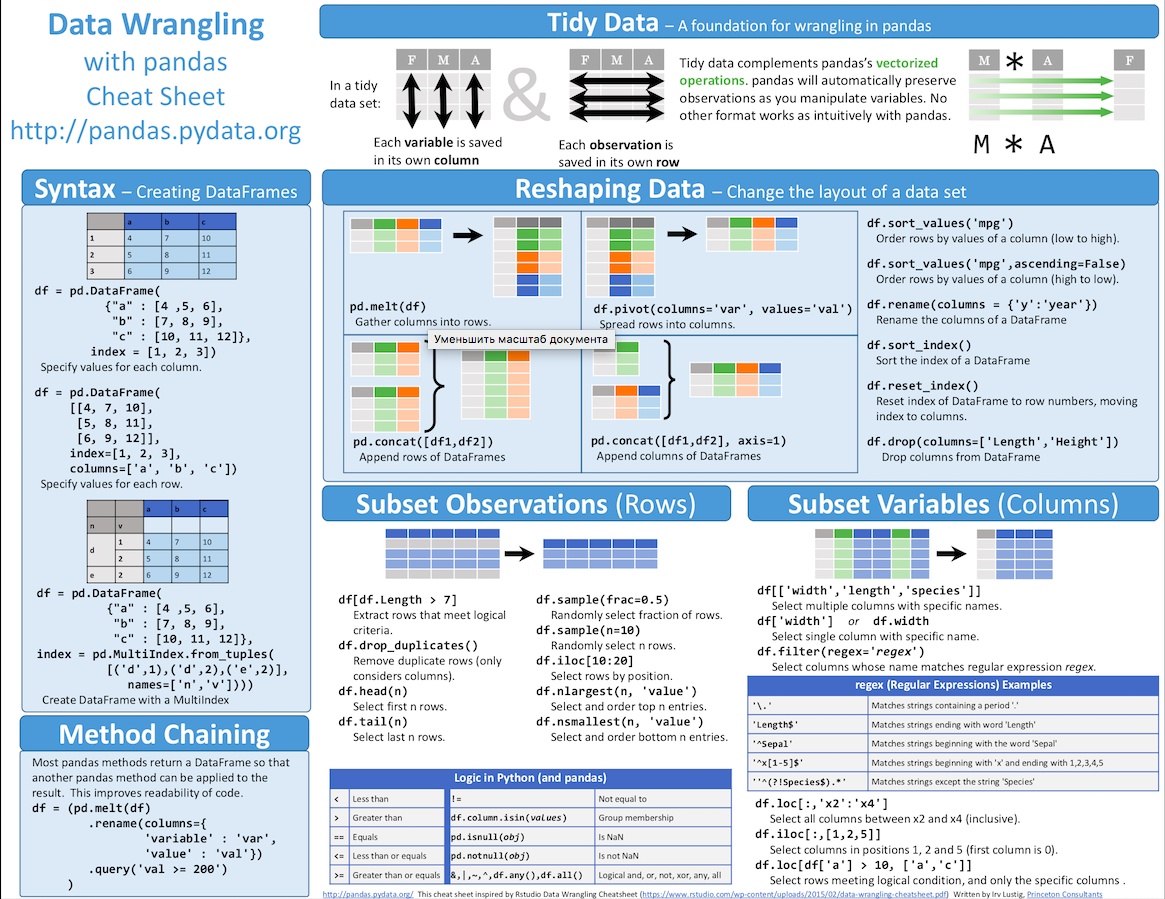

In [93]:
from IPython.display import Image
Image(filename='img/Pandas_Cheat_Sheet_0.png') 

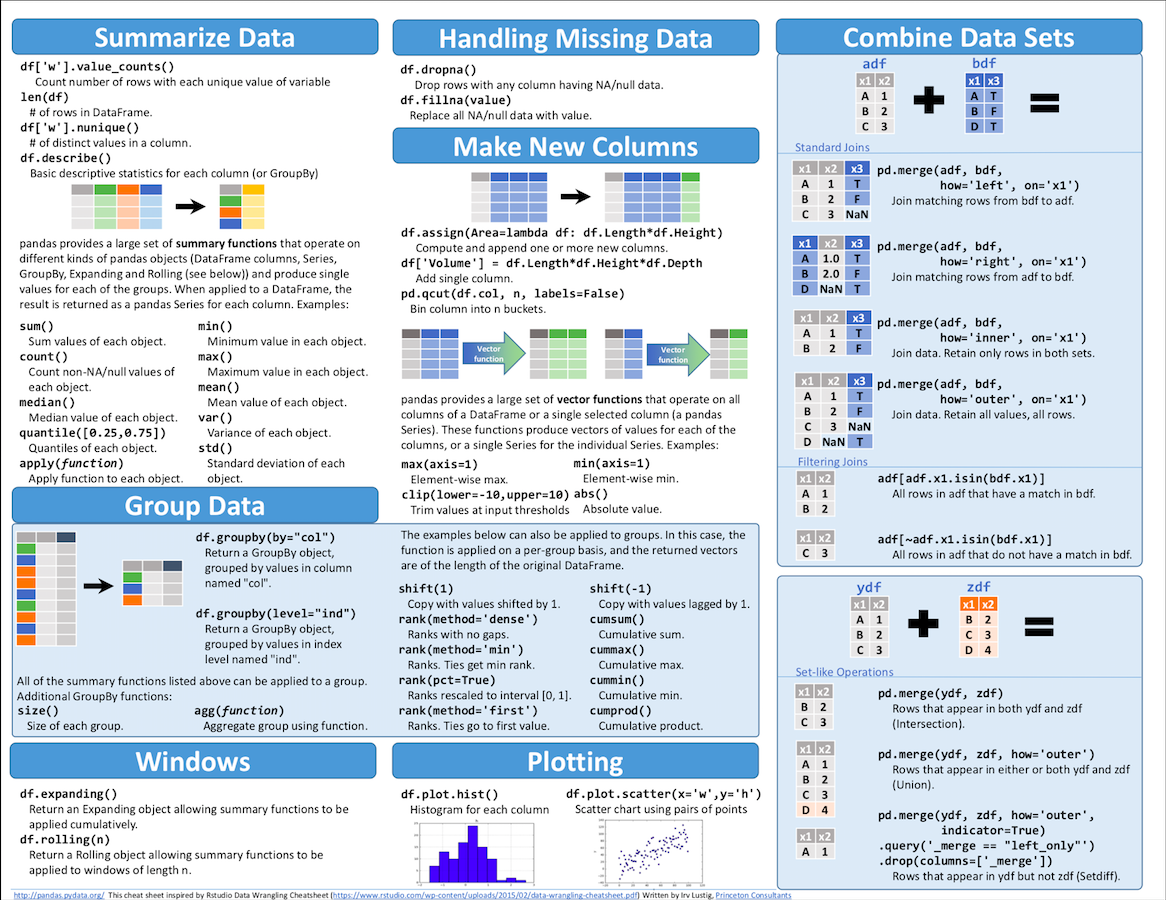

In [94]:
from IPython.display import Image
Image(filename='img/Pandas_Cheat_Sheet_1.png') 

### Series

Series представляет собой изменяемый одномерный массив, к каждому элементу которого прикреплена произвольная метка. Объект класса Series можно создать таким образом:


In [18]:

s = pd.Series([1, 2, 3, 4, 5])
print(s)

0    1
1    2
2    3
3    4
4    5
dtype: int64


Обратите внимание на первый столбец в выведенных на экран объектах Series - это и есть их индекс. Обратиться к нему можно с помощью атрибута index:

In [23]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


По умолчанию индекс представляет собой последовательно возврастающие от нуля числа, но это легко можно изменить, явно указав метки:

In [27]:
s = pd.Series([1, 2, 3], index=['first', 'second', 'third'])
print(s.index)
print(s)

Index(['first', 'second', 'third'], dtype='object')
first     1
second    2
third     3
dtype: int64


Одномерный массив можно создать с помощью словаря Python, при этом ключи становятся метками, а значения - элементами:

In [28]:
s = pd.Series({'a':100, 'b':200, 'c':300})
print(s)

a    100
b    200
c    300
dtype: int64


In [30]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])

# получаем элемент по его позиции
print(s[1])

# обращаемся к элементу по метке
print(s['e'])

# определяем, есть ли метка в объекте Series
print('c' in s)

2
5
True


In [31]:
# получаем срез;
# срез объекта Series  имеет тип Series
print(s[3:1:-1])

d    4
c    3
dtype: int64


In [32]:
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s2 = pd.Series([0.1, 0.2, 0.3], index=['a', 'b', 'c'])
print(s1, '\n')
print(s2)

a    1
b    2
c    3
dtype: int64 

a    0.1
b    0.2
c    0.3
dtype: float64


In [35]:
print(s1 * 3, '\n')
print(s1 + s2, '\n')


a    3
b    6
c    9
dtype: int64 

a    1.1
b    2.2
c    3.3
dtype: float64 



In [36]:
s2.index = ['x', 'a', 'c'] # меняем индекс у объекта s2
print(s2)

x    0.1
a    0.2
c    0.3
dtype: float64


In [37]:
result = s1 - s2
print(result)

a    0.8
b    NaN
c    2.7
x    NaN
dtype: float64


Любые бинарные арифметические операции со значениями `Nan` будут давать `Nan`:

In [39]:
print(result + 1)

a    1.8
b    NaN
c    3.7
x    NaN
dtype: float64


In [40]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
print(s[['a', 'd', 'e']], '\n')

# изменяем сразу несколько элементов
s[['c', 'd']] = 0
print(s)

a    1
d    4
e    5
dtype: int64 

a    1
b    2
c    0
d    0
e    5
dtype: int64


ОБъекты типа Series можно сравнивать между собой и со скалярами. Сравнения, как и другие бинарные операции, выполняются для каждого элемента отдельно. Результатом становится новый объект, у которого в i-ой позиции стоит True, если сравнение соотвествующего элемента дало истину:

In [41]:
s1 = pd.Series([10, 5, 7])
s2 = pd.Series([1, 12, 3])

print(s1 > s2, '\n')
print(s2 == 3)

0     True
1    False
2     True
dtype: bool 

0    False
1    False
2     True
dtype: bool



** Создание объекта Series из 5 элементов, индексированных буквами:**

In [3]:
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 
salaries                                                               

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64

In [4]:
# выбрать значения >250
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

**Индексирование возможно в виде s.Name или s['Name'].**

In [8]:
salaries.Andrew == salaries['Andrew']

True

In [7]:
salaries['Andrew'], salaries.Andrew

(400, 400)

**Series поддерживает пропуски в данных.**

In [10]:
import numpy as np
salaries['Carl'] = np.nan
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [100]:
salaries['Carl']

nan

In [101]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [11]:
salaries.fillna(salaries.median(), inplace=True)

In [105]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

In [14]:
print('Второй элемент серии', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')


Второй элемент серии 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 



In [42]:
s = pd.Series({'aaa':0.1, 'bbb':0.2, 'ccc':0.3})

for item in s:
    print(item)

0.1
0.2
0.3


In [43]:
# так выполняется итерация по меткам:
for item in s.index:
    print(item)

aaa
bbb
ccc


### DataFrame

### Создание и изменение

Класс `DataFrame` представляет двумерный изменяемый массив (матрицу), столбцами которого являются одномерные массивы `Series`. С помощью атрибутов `index` и `columns` задаются метки для строк и столбцов. Как и для типа `Series`, объекты `DataFrame` можно создавать несколькими способами:

In [44]:
# из словаря Series (ключи словаря становятся метками столбцов,
# индексы Series объединяются и образуют индекс для строк)
df = pd.DataFrame({'col1': pd.Series([1, 2, 3], ['row1', 'row2', 'row3']),
                   'col2': pd.Series([0.1, 0.2, 0.3, 0.4], ['row1', 'row2', 'row5', 'row6'])})
print(df)
print(df.index)
print(df.columns)

      col1  col2
row1   1.0   0.1
row2   2.0   0.2
row3   3.0   NaN
row5   NaN   0.3
row6   NaN   0.4
Index(['row1', 'row2', 'row3', 'row5', 'row6'], dtype='object')
Index(['col1', 'col2'], dtype='object')


In [45]:
# из словаря ndarray/list (ключи словаря становятся метками
# столбцов, для строк используется индекс по умолчанию)
df = pd.DataFrame({'c1': [1, 2, 3], 'c2':[4, 5, 6]})
df.index = ['r1', 'r2', 'r3']
print(df)

    c1  c2
r1   1   4
r2   2   5
r3   3   6


In [46]:
df = pd.DataFrame({'c1': pd.Series(np.random.random(3), ['r1', 'r2', 'r3']),
                   'c2': pd.Series(np.random.random(4), ['r1', 'r2', 'r3', 'r4']),
                   'c3': pd.Series(np.random.random(3), ['r1', 'r3', 'r4'])})
print(df)

          c1        c2        c3
r1  0.821722  0.090715  0.453861
r2  0.852802  0.989491       NaN
r3  0.332393  0.748469  0.801780
r4       NaN  0.404138  0.805897


In [50]:
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.074115,a,False
1,0.918929,b,False
2,0.638198,c,False
3,0.314870,d,True
4,0.916153,e,True


In [51]:
type(df2)

pandas.core.frame.DataFrame

**Обращение к элементам (или целым кускам фрейма):**

In [111]:
print('Элемент на 3 позиции в столбце 3 = ', df2.at[3, 'B'], '\n')
print(df2.loc[1:4, 'A':'C'])

Элемент на 3 позиции в столбце 3 =  d 

          A  B      C
1  0.713605  b  False
2  0.238436  c  False
3  0.697666  d   True
4  0.025528  e   True


**Изменение элементов и добавление новых:**

In [52]:
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.074115,a,False
1,0.918929,b,False
2,0.638198,f,False
3,0.314870,d,True
4,0.916153,e,True


In [54]:
df2.loc[4]

A    0.916153
B           e
C        True
Name: 4, dtype: object

In [60]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.074115,a,False
1,0.918929,b,False
2,0.638198,f,False
3,0.314870,d,True
4,0.916153,e,True
5,3.141500,c,False


In [91]:
df1 = pd.DataFrame(np.random.randn(5, 3), 
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,1.866157,0.618182,0.855285
o2,1.478206,-0.178888,-0.240555
o3,-0.611304,-2.084245,1.494189
o4,2.346902,-0.611364,0.295113
o5,-0.708067,-1.487200,0.255467


#### Обработка пропущенных значений

In [94]:
df1.at['o2', 'f2'] = np.nan
df1.at['o4', 'f3'] = np.nan
df1

,f1,f2,f3
o1,1.866157,0.618182,0.855285
o2,1.478206,NaN,-0.240555
o3,-0.611304,-2.084245,1.494189
o4,2.346902,-0.611364,NaN
o5,-0.708067,-1.487200,0.255467


**Можно удалить все строки, где есть хотя бы один пропуск.**

In [88]:
df1.dropna()

,f1,f2,f3
o1,0.221944,-0.585884,0.727738
o3,-2.016033,1.548071,0.924413
o5,-0.291429,0.631765,0.439330


In [89]:
df1.shape

(5, 3)

**Пропуски можно заменить каким-то значением.**

In [124]:
df1.fillna(0)

,f1,f2,f3
o1,1.866157,0.618182,0.855285
o2,1.478206,0.000000,-0.240555
o3,-0.611304,-2.084245,1.494189
o4,2.346902,-0.611364,0.000000
o5,-0.708067,-1.487200,0.255467


### Статистика

В pandas существует большое количество функци и методов, предназначенных для получения различных статистических данных об одномерных и двумерных массивах. В этом разделе мы рассмотрим некоторые из них

In [125]:
s = pd.Series(np.random.random(5))
df = pd.DataFrame({'c1': pd.Series(np.random.random(3), index=['r1', 'r2', 'r3']),
                   'c2': pd.Series(np.random.random(3), index=['r1', 'r2', 'r3'])})

print(s, '\n')
print(df)

0    0.244360
1    0.568059
2    0.311555
3    0.145017
4    0.281446
dtype: float64 

          c1        c2
r1  0.682892  0.945241
r2  0.273054  0.152523
r3  0.599794  0.993420


In [126]:
# статистика для Series
print('sum={}, prod={}'.format(\
       s.sum(), s.prod()))
print('mean={}, var={}, std={}'.format(\
       s.mean(), s.var(), s.std()))

sum=1.550437168741266, prod=0.0017651121012746034
mean=0.3100874337482532, var=0.02473508972908544, std=0.1572739321346212


In [127]:
# статистика для DataFrame (методы все те же)
    
    # сумма элементов по столбцам
print(df.sum(), '\n')

    # сумма элементов по строка
print(df.sum(1))

c1    1.555740
c2    2.091184
dtype: float64 

r1    1.628133
r2    0.425577
r3    1.593214
dtype: float64


In [128]:
# основная статистика для DataFrame (для Series тот же метод)
print(df.describe())

             c1        c2
count  3.000000  3.000000
mean   0.518580  0.697061
std    0.216653  0.472199
min    0.273054  0.152523
25%    0.436424  0.548882
50%    0.599794  0.945241
75%    0.641343  0.969330
max    0.682892  0.993420


## Пример первичного анализа данных с Pandas

In [96]:
import os
import pandas as pd

Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

Скачаем данные:

In [97]:
url = 'https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/ff414a1bcfcba32481e4d4e8db578e55872a2ca1/titanic.csv'

In [98]:
pass_data = pd.read_csv(url, sep='\t')
#если делаете без интернета воспользуйтесь следующей строчкой
#pass_data = pd.read_csv('data/titanik.csv', sep='\t')

In [100]:
#сохраним файлы локально
pass_data.to_csv('titanik.csv')

Данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [101]:
pass_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


In [102]:
pass_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Посмотрим на признаки:

In [103]:
pass_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

В этом ноутбуке мы думали, что названия столбцов начинаются с маленькой буквы, а в данных первая буква заглавная, придется исправить:

In [104]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
PassengerId    156 non-null int64
Survived       156 non-null int64
Pclass         156 non-null int64
Name           156 non-null object
Sex            156 non-null object
Age            126 non-null float64
SibSp          156 non-null int64
Parch          156 non-null int64
Ticket         156 non-null object
Fare           156 non-null float64
Cabin          31 non-null object
Embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.7+ KB


In [105]:
pass_data = pass_data.rename (str.lower, axis="columns")

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [106]:
pass_data[2:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S


In [107]:
pass_data.iloc[1:5, 1:3]

,survived,pclass
1,1,1
2,1,3
3,1,1
4,0,3


In [108]:
pass_data['name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: name, dtype: object

In [109]:
pass_data[['name', 'sex', 'pclass']].head()

,name,sex,pclass
0,"Braund, Mr. Owen Harris",male,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1
2,"Heikkinen, Miss. Laina",female,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1
4,"Allen, Mr. William Henry",male,3


Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [110]:
pass_data[pass_data['sex'] == 'female'].head() # женщины на борту

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [111]:
pass_data.shape

(156, 12)

In [112]:
# TASK: вывести женщин старше 60 и мужчины на борту
# Ваш код здесь
# 


& - и | - или

In [113]:
pass_data[pass_data['sex']=='female'].sort_values(['age'], ascending=False)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [114]:
# TASK: Посмотрим, сколько на борту было относительно молодых женщин,
# путешествующих в одиночку. Скорее всего, довольно мало,
# потому что в такое длительное путешествие молодых девушек одних не отпустили бы опекающие родственники.
# Ваш код здесь
# 

Кроме того, для заданного признака можно построить гистограмму:

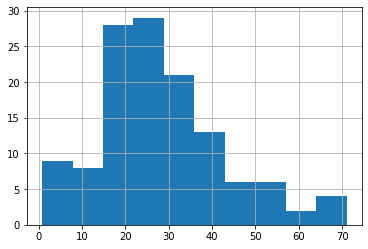

In [115]:
pass_data.age.hist(bins = 10)

## Редактирование DataFrame

* Переименование признаков

In [129]:
pass_data.rename(columns={'sex': 'Sex'}, inplace=True)
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Применение преобразования к существующему признаку. Например, выделим фамилию:

In [130]:
# TASK: написать функцию возвращающее фамилию


In [131]:
last_names = pass_data['name'].apply(get_last_name)
last_names.head()

NameError: name 'get_last_name' is not defined

* Добавление признака

In [119]:
pass_data['Last_name'] = last_names
pass_data.head()

NameError: name 'last_names' is not defined

* Удаление признака

In [120]:
pass_data.drop('Last_name', axis=1).head()

KeyError: "['Last_name'] not found in axis"

In [121]:
pass_data.head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

KeyError: "['Last_name'] not found in axis"

* Работа с пропущенными данными

In [150]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
passengerid    156 non-null int64
survived       156 non-null int64
pclass         156 non-null int64
name           156 non-null object
Sex            156 non-null object
age            126 non-null float64
sibsp          156 non-null int64
parch          156 non-null int64
ticket         156 non-null object
fare           156 non-null float64
cabin          31 non-null object
embarked       155 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 14.7+ KB


Методы isnull() и notnull() позволяют получить бинарный массив, отражающий отсутствие или наличие данных для каждого из объектов соответственно:

In [151]:
pass_data['cabin'].isnull().head()

pass_data[pass_data['cabin'].notnull()].head() # пассажиры с известным номером шлюпки эвакуации

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


* Сортировка объектов/признаков

In [152]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
64,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [153]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

,passengerid,survived,pclass,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S


## Группировка данных

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [154]:
pass_data.groupby('Sex') # разбиение всех объектов на 2 группы по полу

In [155]:
pass_data.groupby('Sex')['pclass'].value_counts()

Sex     pclass
female  3         35
        2         12
        1          9
male    3         61
        1         21
        2         18
Name: pclass, dtype: int64

In [156]:
pass_data.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,30.0,79.50194,65.172104,26.2833,48.290625,61.6792,78.721875,263.0000
2,30.0,23.65972,16.048141,10.5000,13.000000,21.0000,27.312500,73.5000
3,96.0,13.44006,9.998511,6.7500,7.854200,8.0500,15.309350,56.4958


In [157]:
pass_data.groupby('Sex')['age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    24.468085
male      30.326962
Name: age, dtype: float64

Как известно, в первую очередь спасали женщин и детей в порядке повышения номера класса, в связи с этим доля выживших женщин, вероятно, будет выше, чем доля выживших мужчин. Проверим:

In [158]:
pass_data.groupby('Sex')['survived'].mean()

Sex
female    0.714286
male      0.140000
Name: survived, dtype: float64

Аналогично для пассажиров различных классов:

In [159]:
pass_data.groupby('pclass')['survived'].mean()

pclass
1    0.400000
2    0.466667
3    0.291667
Name: survived, dtype: float64

Рассмотренные выше статистические данные могут быть рассмотрены и в виде стандартного DataFrame:

In [160]:
pass_data.groupby('Sex', as_index=False)['survived'].mean()

,Sex,survived
0,female,0.714286
1,male,0.140000


## Сохранение данных

Также данные можно сохранить в файл:

In [161]:
pass_data.to_csv('titanic_2.csv', index=False)

# Самостоятельная работа  №1 

In [163]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [164]:
# 1. создать датафрейм
# Ваш код здесь

In [ ]:
# Вывести первые 3 строки
# Ваш код здесь

In [ ]:
# Вывести значения где пропущены age
# Ваш код здесь

In [ ]:
# Вывести сумму всех посещений
# Ваш код здесь

In [ ]:
# Посчитать количество каждого типа в колонке animal
# Ваш код здесь

In [ ]:
# Сохранить в формате csv
# Ваш код здесь